# Course : Video edit

## Winter semister 2021-22

##### Christina Seventikidou

##### Tutor: L. Kontis

# Project 2 - 35%

#### Part 1
Part 1 is about the demonstration of the property of energy compaction that DCT does. This means that the energy of a signal get gathered in a few DCT Coefficients.
#### Part 2
Part 2 is about the demonstration of the property of energy compaction that KLT does.
###### For every task the results and images are displayed below.

Before starting the implementation it would be usefull to explain what energy compaction is. Energy compaction means that a large proportion of the total signal energy is contained in a handful of coefficients. In simple words,  if A is the transformation matrix, it can be proved that the energy in x and Ax are same(Energy conservation property). Energy compaction means that the energy of Ax=y is more concentrated in some elements compared to the distribution of energy in x. DCT is said to have strong energy compaction property, such also KLT.

# PART 1

In [513]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image #with image we create image objects
from scipy import misc # pip install Pillow

import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

from scipy import fft
from scipy.fft import dct

### 1. load image

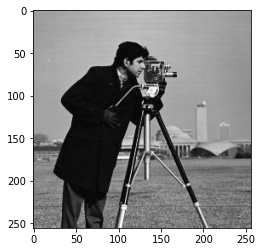

In [918]:
img = Image.open('cameraman.jpg')
plt.imshow(img, cmap='gray')

In [936]:
# image-> array
img = np.asarray(img)
img.shape

(256, 256)

In [920]:
#define dct 
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

### 2. 8x8 dct on image

In [921]:
#2. 8x8 dct on img
imsize = img.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( img[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, '8x8 DCTs of the image')

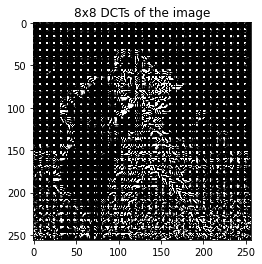

In [922]:
#display all dct blocks
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0) #vmax = np.max(dct)*0.01,vmin = 0 are for normalization
plt.title( "8x8 DCTs of the image")

### 3. Keep 20 coefficients of each 8x8 block

In [923]:
#function that calculates the 20 biggest coefficients, a is an 8x8 block
def coeff(a): 
    array = a.flatten()
    #array = np.abs(array)
    sorted_index_array = np.argsort(np.abs(array))
    sorted_array = np.abs(array[sorted_index_array])
    n = 20
    coef = sorted_array[-n : ]
    for k in range(array.shape[0]):
        if np.abs(array[k]) not in coef:
            array[k]=0
    return np.reshape(array, (8, 8))

In [924]:
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = coeff( dct[i:(i+8),j:(j+8)] )

### 4. idct for each block and display of the dct compressed image

In [925]:
def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

Text(0.5, 1.0, 'Comparison between original and DCT20 compressed images')

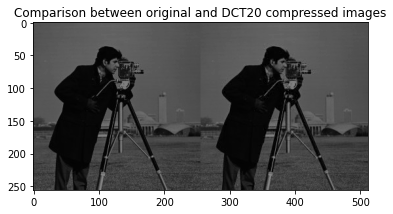

In [926]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img, im_dct) ) ,cmap='gray',vmax = np.max(dct)*0.3,vmin = 1)
plt.title("Comparison between original and DCT20 compressed images" )

## PSNR
PSNR is most commonly used to estimate the efficiency of compressors, filters, etc. The larger the value of PSNR, the more efficient is a corresponding compression or filter method.

In [929]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [930]:
value = PSNR(img, im_dct)
print(f"PSNR value is {value} dB")

PSNR value is 34.54622871366277 dB


##### the same experiment for 10 coefficients:

In [937]:
#2. 8x8 dct on img
imsize = img.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( img[i:(i+8),j:(j+8)] )

In [938]:
#function that calculates the 20 biggest coefficients, a is an 8x8 block
def coeff(a): 
    array = a.flatten()
    #array = np.abs(array)
    sorted_index_array = np.argsort(np.abs(array))
    sorted_array = np.abs(array[sorted_index_array])
    n = 10
    coef = sorted_array[-n : ]
    for k in range(array.shape[0]):
        if np.abs(array[k]) not in coef:
            array[k]=0
    return np.reshape(array, (8, 8))

In [939]:
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = coeff( dct[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, 'Comparison between original and DCT10 compressed images')

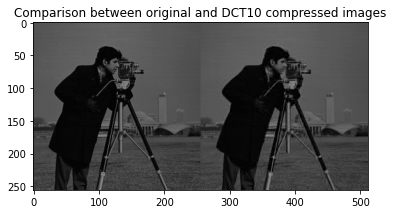

In [940]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img, im_dct) ) ,cmap='gray',vmax = np.max(dct)*0.3,vmin = 1)
plt.title("Comparison between original and DCT10 compressed images" )

In [941]:
value = PSNR(img, im_dct)
print(f"PSNR value is {value} dB") #less from dct 20 coefs, as expected

PSNR value is 28.851739619563837 dB


# PART 2

#### 1. load image and seperate it  in 8x8 blocks

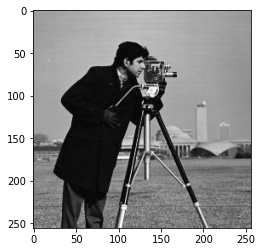

In [942]:
img = Image.open('cameraman.jpg')
plt.imshow(img, cmap='gray')

In [943]:
# image-> array
img = np.asarray(img)
img.shape

(256, 256)

In [944]:
#2. 8x8 blocks on image
imsize = img.shape
block_img = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        block_img[i:(i+8),j:(j+8)] = img[i:(i+8),j:(j+8)]

In [945]:
block_img.shape

(256, 256)

### 2. make 65-value vectors of each 8x8 block and sort them

In [946]:
def sort(a):  #a is a block 8x8
    array = a.flatten() #64x1    
    return array

In [947]:
vectors=[]
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        k = sort(img[i:(i+8),j:(j+8)])
        vectors.append(k)

In [948]:
vectors = np.array(vectors)
print(vectors.shape) #we have 1024 si vectors, i =1, .. 1024, of size 64
print(vectors[0])#the first vector
print(vectors[0].shape)

(1024, 64)
[157 156 156 155 155 156 158 158 157 157 157 157 157 158 158 159 157 157
 158 158 159 159 158 158 155 156 157 158 159 158 157 157 154 155 156 157
 157 157 156 155 154 154 155 155 156 156 155 155 155 155 155 155 155 156
 156 157 157 156 156 155 155 156 158 158]
(64,)


We see that vectors have (64,) dimention!We need (64,1) for calculation at next steps:

In [949]:
vect=[]
for i in range(vectors.shape[0]):
    m = vectors[i]
    m = m.reshape(-1,1)
    vect.append(m)
vect = np.array(vect)
vect[0].shape

(64, 1)

### 3. estimate mean and covariance matrix
$$ h = \frac{1}{1024} \sum_{i=1}^{1024} si $$

In [950]:
#mean
sum = np.zeros(64)
for i in range(vectors.shape[0]):
    sum = sum + vectors[i]
h = sum/1024
h = h.reshape(-1,1)
h.shape #the mean of each si vector ---> so we have 64 vectors

(64, 1)

In [952]:
#covariance
sum = np.zeros((64,64))
for i in range(vectors.shape[0]):
    sum = sum + (vect[i]-h)*((vect[i]-h).T)
C = sum/1024
C= np.array(C)
print(C.shape) #covariance matrix

(64, 64)


In [953]:
False in (C== C.T) # C=C^t as should

False

### 4 & 5. KLT 

We want KLT for each si vector with 64 values. We can also the covariance matrix C of each 8x8 block (i.e vector si) which is C

In [990]:
def KLTblock(a): #a is an 8x8 block which accepts KLT transform
    a = a.flatten()   #make it 64 value vector
    val,vec = np.linalg.eig(C) #values li and eigenvectors of covariance matrix
    klt = np.dot(vec,a) #klt = vec * a
    return np.reshape(klt, (8, 8)) 

In [991]:
#2. 8x8 klt on img
imsize = img.shape
klt = np.zeros(imsize)

# Do 8x8 klt on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:                                  #KLTblock accepts an 8x8 block and returns the klt transformed
        klt[i:(i+8),j:(j+8)] = KLTblock( img[i:(i+8),j:(j+8)] ) #so in klt is 256x256 with 8x8 klt on image

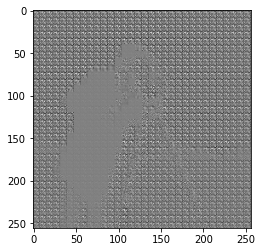

In [982]:
plt.imshow(klt, cmap='gray')

### 6. cut 20 coefficients

In [983]:
#function that calculates the 20 biggest coefficients, a is an 8x8 block(64 value vector)
def coeff(a): #a is an 8x8 block
    array = a.flatten()
    sorted_index_array = np.argsort(np.abs(array))
    sorted_array = np.abs(array[sorted_index_array])
    n = 20
    coef = sorted_array[-n : ]
    for k in range(array.shape[0]):
        if np.abs(array[k]) not in coef:
            array[k]=0
    return np.reshape(array, (8, 8))

In [984]:
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        klt[i:(i+8),j:(j+8)] = coeff( klt[i:(i+8),j:(j+8)] ) #so klt is now corrected keeping 20 coeffs in each block

### 7. inverse klt and plot

In [992]:
def iklt(a):                   #inverse klt function
    a=a.flatten()
    val,vec = np.linalg.eig(C)
    ikl= np.dot(vec.T,a)
    return np.reshape(ikl, (8, 8)) 

Text(0.5, 1.0, 'Comparison between original and DCT20 compressed images')

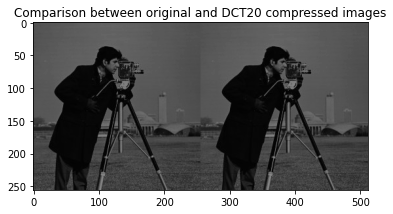

In [993]:
im_klt = np.zeros(imsize)    #apply inverse ktl to klt 8x8 blocks of image and plot

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_klt[i:(i+8),j:(j+8)] = iklt( klt[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img, im_klt) ) ,cmap='gray',vmax = np.max(dct)*0.3,vmin = 1)
plt.title("Comparison between original and DCT20 compressed images" )

## same experiment with 10 coefs

In [1008]:
#2. 8x8 klt on img
imsize = img.shape
klt = np.zeros(imsize)

# Do 8x8 klt on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:                                  #KLTblock accepts an 8x8 block and returns the klt transformed
        klt[i:(i+8),j:(j+8)] = KLTblock( img[i:(i+8),j:(j+8)] ) #so in klt is 256x256 with 8x8 klt on image

In [1004]:
#function that calculates the 20 biggest coefficients, a is an 8x8 block(64 value vector)
def coeff(a): #a is an 8x8 block
    array = a.flatten()
    sorted_index_array = np.argsort(np.abs(array))
    sorted_array = np.abs(array[sorted_index_array])
    n = 10
    coef = sorted_array[-n : ]
    for k in range(array.shape[0]):
        if np.abs(array[k]) not in coef:
            array[k]=0
    return np.reshape(array, (8, 8))

In [1005]:
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        klt[i:(i+8),j:(j+8)] = coeff( klt[i:(i+8),j:(j+8)] ) #so klt is now corrected keeping 10 coeffs in each block

In [1009]:
def iklt(a):                   #inverse klt function
    a=a.flatten()
    val,vec = np.linalg.eig(C)
    ikl= np.dot(vec.T,a)
    return np.reshape(ikl, (8, 8)) 

Text(0.5, 1.0, 'Comparison between original and DCT10 compressed images')

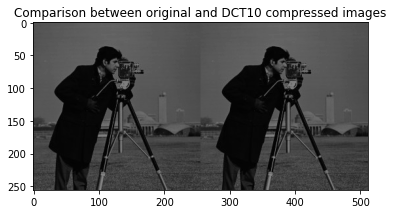

In [1010]:
im_klt = np.zeros(imsize)    #apply inverse ktl to klt 8x8 blocks of image and plot

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_klt[i:(i+8),j:(j+8)] = iklt( klt[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img, im_klt) ) ,cmap='gray',vmax = np.max(dct)*0.3,vmin = 1)
plt.title("Comparison between original and DCT10 compressed images" )

In klt we calculated the covariance matrix C using the same mean value h for all vectors si. This is not true and so psnr is less than what dct gives.